# **Week 11 - One Way ANOVA**

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy
import seaborn as sns

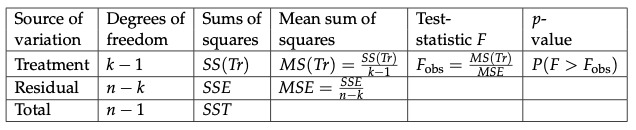

## **Exercise 8.1 Environment action plans**

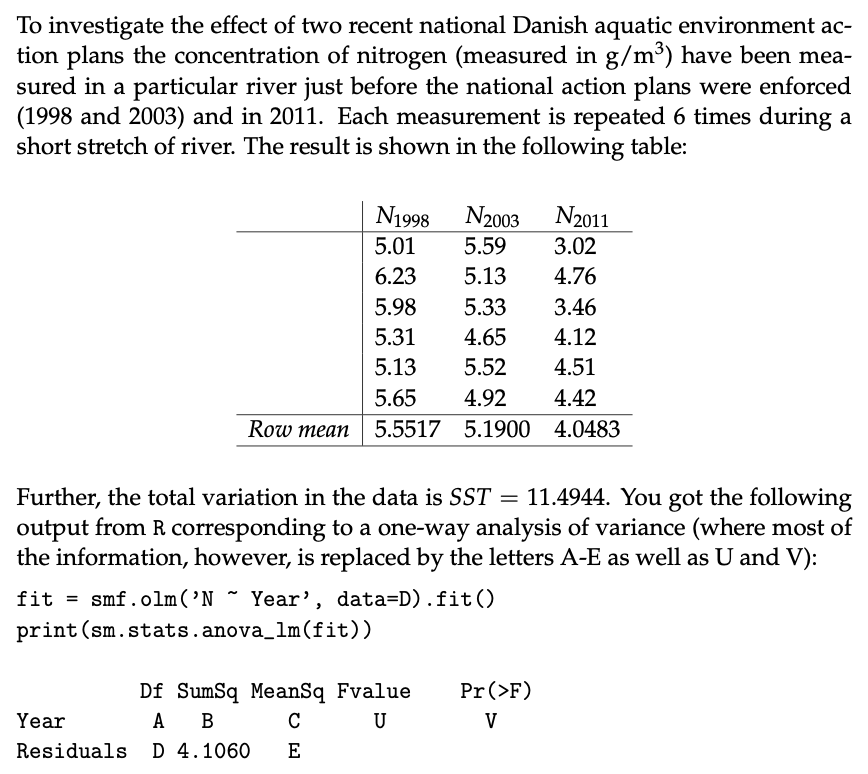

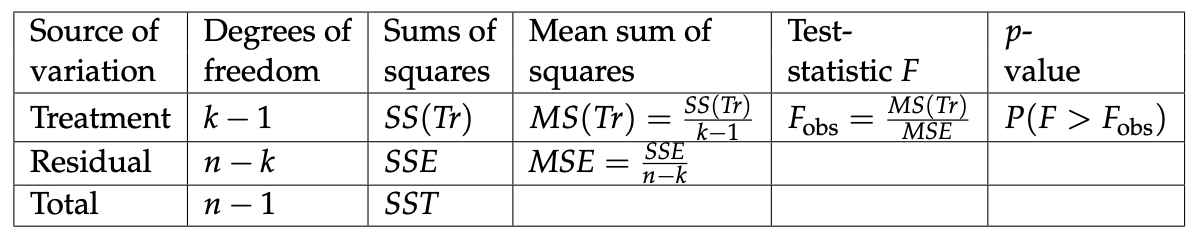

### **a) What numbers did the letters A-D substitute?**

In [82]:
# Following the table on page 11

# First, we have:
n = 3 * 6  # Total number of observations
k = 3      # Number of groups

SSE = 4.1060  # Sum of squared residuals ("Variance remaining after model")
SST = 11.4944 # Total sum of squares ("Total variance")

# A and D are the degrees of freedom:
A = k - 1  # Degrees of freedom for treatment
D = n - k  # Degrees of freedom for residuals

print(f"Degrees of freedom for treatment (A): {A}")
print(f"Degrees of freedom for residuals (D): {D}")

# B corresponds to SS(tr), which we can solve via SST = SSE + SStr
SStr = SST - SSE  # Sum of squares for treatment ("Variance explained by model")
print(f"\nSum of squares for treatment (B): {SStr}")

# C corresponds to the mean sum of squares for treatment
MStr = SStr / (k - 1)
print(f"\nMean sum of squares for treatment (C): {MStr}")

# E corresponds to the mean sum of squares for residuals
MSE = SSE / (n - k)
print(f"\nMean sum of squares for residuals (E): {MSE}")



Degrees of freedom for treatment (A): 2
Degrees of freedom for residuals (D): 15

Sum of squares for treatment (B): 7.388400000000001

Mean sum of squares for treatment (C): 3.6942000000000004

Mean sum of squares for residuals (E): 0.27373333333333333


### **b) If you use the significance level α = 0.05, what critical value should be used for the hypothesis test carried out in the analysis (and in the table illustrated with the figures U and V)?**

In [83]:
# U corresponds to Fobs:
Fobs = MStr / MSE
print(f"\nFobs (U): {Fobs}")

critical_value = stats.f.ppf(1 - 0.05, dfn=A, dfd=D)
print(f"\nCritical value: {critical_value}")

# V corresponds to the p-value:
p_value = 1 - stats.f.cdf(Fobs, dfn=A, dfd=D)
print(f"\np-value (V): {p_value}")




Fobs (U): 13.495616171456406

Critical value: 3.6823203436732412

p-value (V): 0.00044360332263027047


### **c) Can you with these data demonstrate statistically significant (at significance level α = 0.05) differences in N-mean values from year to year (both conclusion and argument must be valid)?**

Yes, the p-value is significant, so there is a difference betweent the years.

### **d) Compute the 90% confidence interval for the single mean difference between year 2011 and year 1998.**

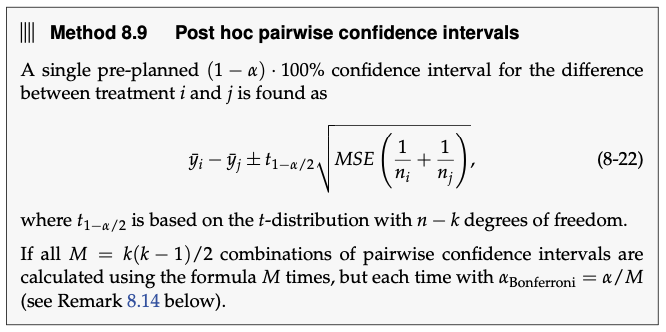

In [87]:
# Using method 8.9
# This is the mean difference between 2011 and 1998:
mean_diff = 4.0483 - 5.5517
n_i = 6


# Compute the confidence interval
confidence_level = 0.90  # 90% confidence interval
alpha = 1 - confidence_level
critical_t = stats.t.ppf(1 - alpha / 2, df=n - k)  # Critical t-value
margin_of_error = critical_t * np.sqrt(MSE * (2 / n_i))  # Margin of error

# Confidence interval
confidence_interval = (mean_diff - margin_of_error, mean_diff + margin_of_error)
confidence_interval


(-2.032938580414478, -0.9738614195855223)

## **Exercise 8.2 Environment action plans (part 2)**

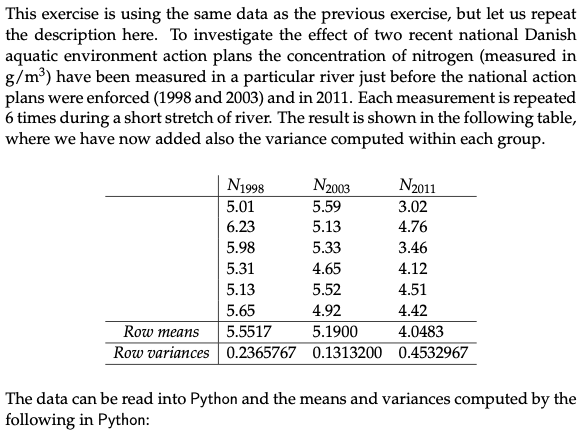

In [ ]:
nitrogen = np.array([
5.01, 5.59, 3.02,
6.23, 5.13, 4.76,
5.98, 5.33, 3.46,
5.31, 4.65, 4.12,
5.13, 5.52, 4.51,
5.65, 4.92, 4.42
])
year = pd.Categorical(np.tile(["1998", "2003", "2011"], 6))
df = pd.DataFrame({"nitrogen": nitrogen, "year": year})

In [21]:
print(df.groupby("year")["nitrogen"].mean())

year
1998    5.551667
2003    5.190000
2011    4.048333
Name: nitrogen, dtype: float64


In [22]:
print(df.groupby("year")["nitrogen"].var())

year
1998    0.236577
2003    0.131320
2011    0.453297
Name: nitrogen, dtype: float64


In [23]:
print(df["nitrogen"].mean())

4.930000000000001


### **a) Compute the three sums of squares (SST, SS(Tr) and SSE) using the three means and three variances, and the overall mean (show the formulas explicitly).**

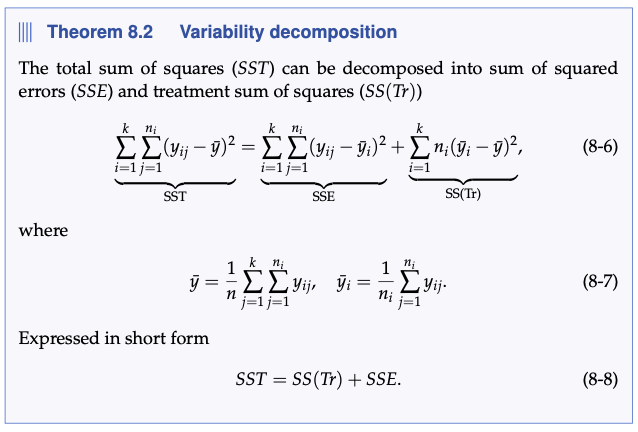

In [33]:
means = df.groupby("year")["nitrogen"].mean()
vars = df.groupby("year")["nitrogen"].var()
overall_mean = df["nitrogen"].mean()

In [30]:
# Calculate SSE (Sum of Squares for Errors)
SSE = (
    np.sum((nitrogen[year == "1998"] - means[0])**2) +
    np.sum((nitrogen[year == "2003"] - means[1])**2) +
    np.sum((nitrogen[year == "2011"] - means[2])**2)
)

In [35]:
# Calculate SSTr (Sum of Squares for Treatments)
SSTr = np.sum(6 * (means - overall_mean)**2)  # 6 is the sample size per group

# Calculate SST (Total Sum of Squares)
SST = SSE + SSTr
# Alternatively:
SST_alt = np.sum((nitrogen - np.mean(nitrogen))**2)

print(f"SSE: {SSE}")
print(f"SSTr: {SSTr}")
print(f"SST: {SST}")

SSE: 4.105966666666667
SSTr: 7.38843333333334
SST: 11.494400000000006


### **b) Find the SST-value in Python using the sample variance function var.**

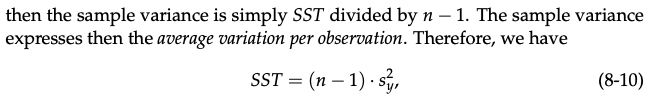

In [41]:
SST = (n-1)*df["nitrogen"].var() 
print(f"SST: {SST}")

SST: 11.494400000000002


### **c) Run the ANOVA in Python and produce the ANOVA table in Python**

In [46]:
fit = smf.ols("nitrogen ~ year", data=df).fit()
anova = sm.stats.anova_lm(fit)
print(anova)

            df    sum_sq   mean_sq          F    PR(>F)
year       2.0  7.388433  3.694217  13.495787  0.000444
Residual  15.0  4.105967  0.273731        NaN       NaN


### **d) Do a complete post hoc analysis, where all the 3 years are compared pairwise.**

We want to perform 3 post-hoc analyses, which are the pairwise confidence intervals based on method 8.9.

However, since all sample sizes (n's) are the same (each has 6 observations), all confidence intervals will have the same length. 

Therefore, we can simply calculate the LSD value using Remark 8.13.

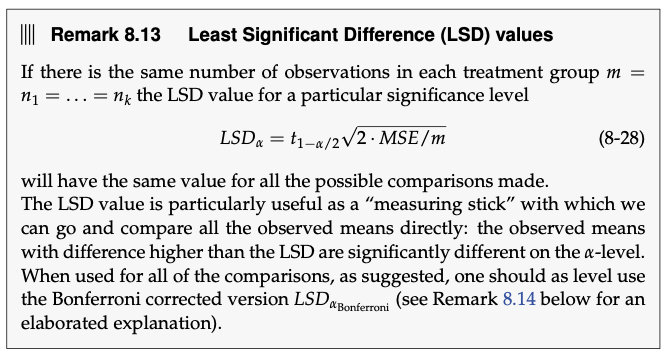

In [ ]:

#our new alpha value becomes:

k = 3 #number of groups
m = 6 #number of elements in each group

# number of pairwise comparisons we need to do:
M = k*(k-1)/2
#or 
M = int(scipy.special.binom(k, 2))
print(f"Number of comparisons: {M}")

# bonferroni correction:
alpha_bonf= alpha/M
print(f"New alpha value: {alpha_bonf}")

Number of comparisons: 3
New alpha value: 0.033333333333333326


In [64]:
MSE = SSE/(n-k)
LSD = stats.t.ppf(1-alpha_bonf/2, df=n-k) * np.sqrt(2*MSE/m)
# dvs. de observede means med en forskel større end 0.814 vil være sig.
#forskellige på et 5% niveau.
print(f"LSD: {LSD}")

#pairwise comparisons
print("\n1998 vs 2003:", means[0]-means[1])
print("1998 vs 2011:", means[0]-means[2])
print("2003 vs 2011:", means[1]-means[2])


LSD: 0.7077172301918053

1998 vs 2003: 0.36166666666666636
1998 vs 2011: 1.5033333333333339
2003 vs 2011: 1.1416666666666675


This means that 2011 differs from both 1998 and 2003, but 1998 and 2003 do not differ from each other since their mean difference is smaller than the LSD.

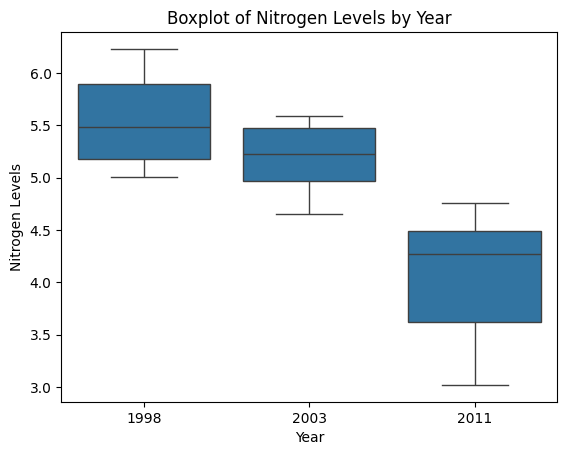

In [67]:
# Boxplot to visualize nitrogen levels across years
sns.boxplot(x="year", y="nitrogen", data=df)

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Nitrogen Levels")
plt.title("Boxplot of Nitrogen Levels by Year")
plt.show()


### **e) Use Python to do model validation by residual analysis.**

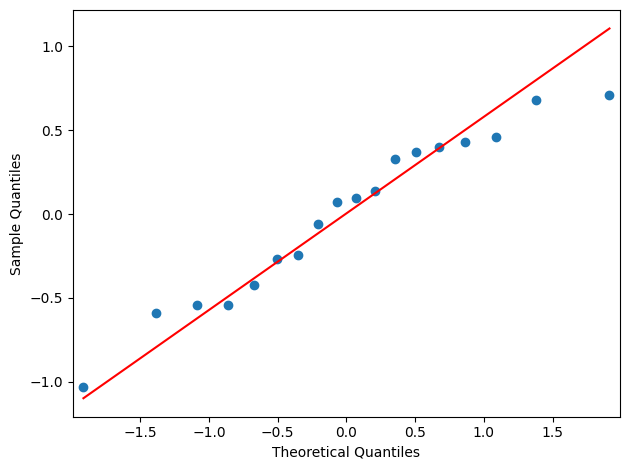

In [69]:
sm.qqplot(fit.resid, line='q',a=1/2)
plt.tight_layout()
plt.show()

The residuals look normally distributed.

## **Exercise 8.3 Plastic film**

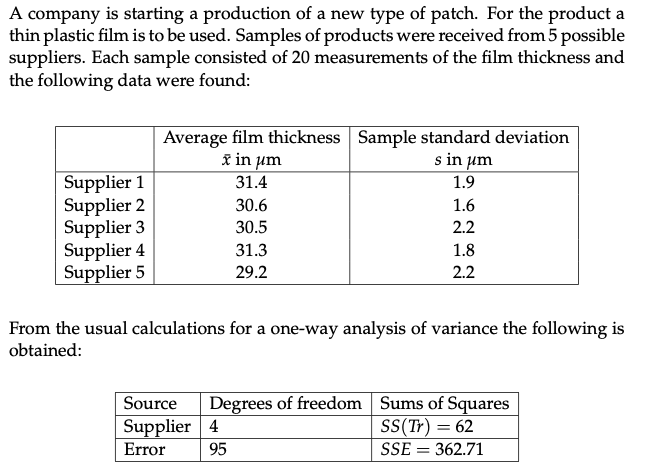

### **a) Is there a significant (α = 5%) difference between the mean film thicknesses for the suppliers (both conclusion and argument must be correct)?**

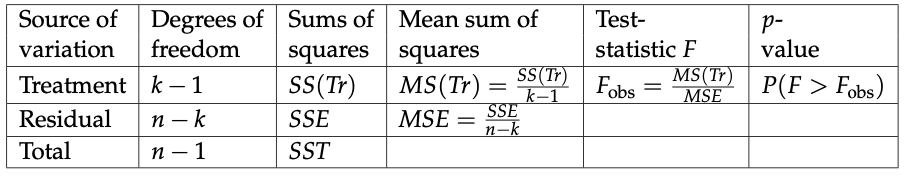

In [71]:
SSTr = 62
SSE = 362.71

SST = SSTr + SSE

k = 5 # number of groups
n = 5*20 #total number of observations

Fobs = (SSTr/(k-1))/(SSE/(n-k))
print(f"Fobs: {Fobs}")

#p-value is
p_value = 1 - stats.f.cdf(Fobs, dfn=k-1, dfd=n-k)
print(f"p-value: {p_value}")

Fobs: 4.059717129387114
p-value: 0.0044074212552240866


Yes, there is a difference between thickness.

### **b) Compute a 95% confidence interval for the difference in mean film thicknesses of Supplier 1 and Supplier 4 (considered as a “single pre-planned” comparison).**

In [73]:
# Given values
mean1 = 31.4
mean4 = 31.3
MSE = SSE / (n - k) 
alpha = 0.05
n_group = 20  # Number of observations per group

# Confidence interval calculation
diff = mean1 - mean4
ci = diff + np.array([-1, 1]) * stats.t.ppf(1 - alpha / 2, df=n - k) * np.sqrt(MSE * (2 / n_group))

print(f"Confidence interval: {ci}")


Confidence interval: [-1.12668594  1.32668594]


No difference between supplier 1 and 2.

## **Exercise 8.4 Brass alloys**

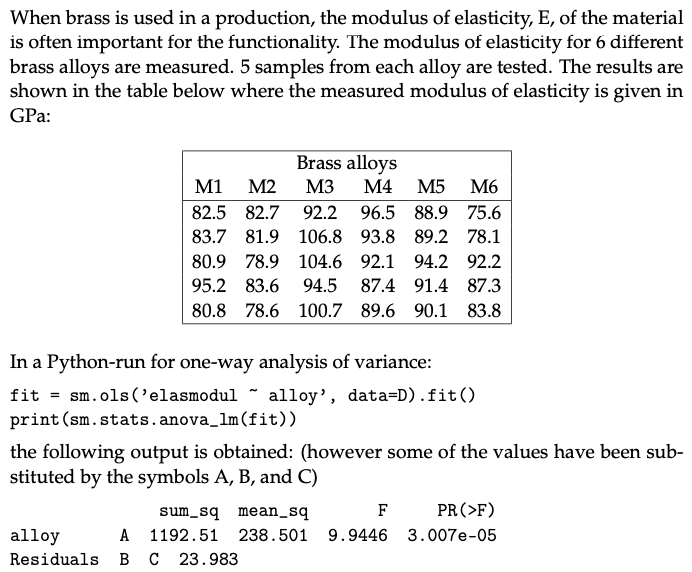

### **a) What are the values of A, B, and C?**

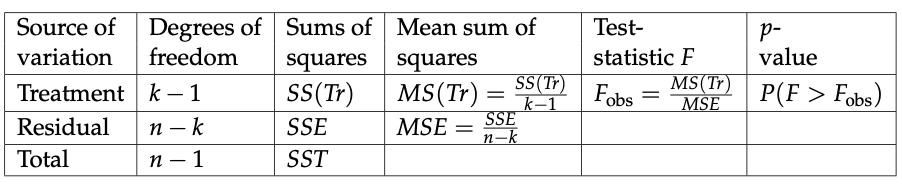

In [75]:
n = 5*6 #number of observations
k = 6 #number of groups

#A and B are the degrees of freedom:
A = k-1
B = n-k

print(f"Degrees of freedom for treatment (A): {A}")
print(f"Degrees of freedom for residuals (B): {B}")

#C is SSE which we can find by SSE = MSE * (n-k)
MSE = 23.983
SSE = MSE * (n-k)
print(f"SSE (C): {SSE}")



Degrees of freedom for treatment (A): 5
Degrees of freedom for residuals (B): 24
SSE (C): 575.592


### **b) Assumptions**

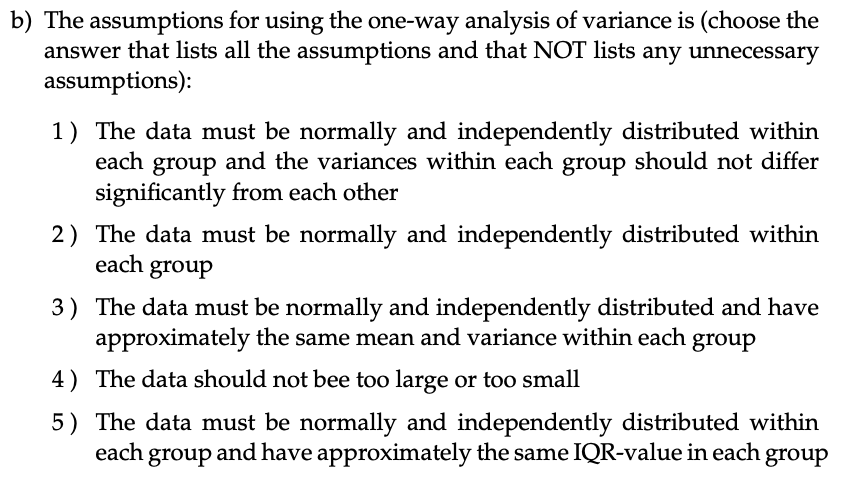

It is difficult to make a lot of arguments here, but simply emphasize that only in Answer 1 all assumptions needed, and no unnecessary assumptions, are listed.

### **c) Compute a 95% confidence interval for the single pre-planned difference between brass alloy 1 and 2.**

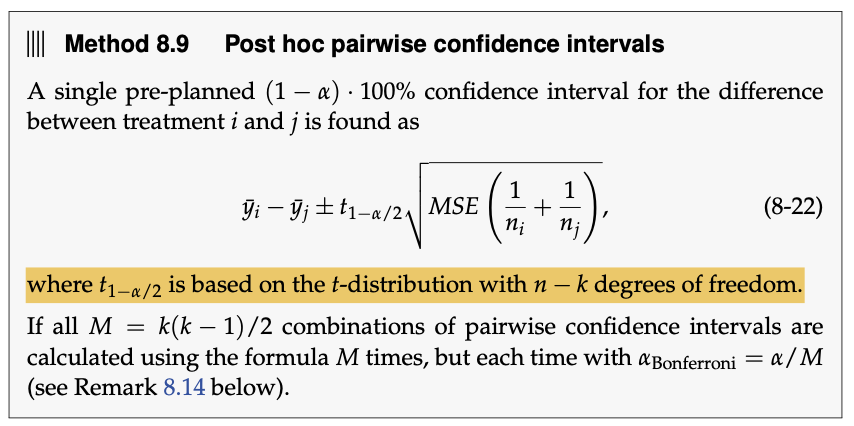

In [76]:
# Given data
group1 = [82.5, 83.7, 80.9, 95.2, 80.8]
group2 = [82.7, 81.9, 78.9, 83.6, 78.6]

# Calculate means
mean1 = np.mean(group1)
mean2 = np.mean(group2)

# Degrees of freedom and Mean Squared Error (replace `MSE`, `n`, and `k` with actual values)
df = n - k
alpha = 0.05
standard_error = np.sqrt(MSE * (2 / len(group1)))

# Confidence interval
diff = mean1 - mean2
ci = diff + np.array([-1, 1]) * stats.t.ppf(1 - alpha / 2, df=df) * standard_error

print(f"Confidence interval: {ci}")


Confidence interval: [-2.9124906  9.8724906]


No difference between alloy 1 and 2.